# Import libraries

In [ ]:
from skimage.io import imread
from skimage import data, img_as_float
from skimage.color import rgb2gray

from skimage.util import random_noise

import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

# Helper functions

In [ ]:
def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def box_kernel(size=5):
    return np.ones((size, size))/size**2

In [ ]:
def gaussian2D(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)
  x1, y1 = np.meshgrid(x, y)
  z = np.exp(-((x1-size//2)**2+(y1-size//2)**2)/(2*(sigma**2)))
  z = z/((((2*np.pi)**0.5)*sigma)**2)

  return z

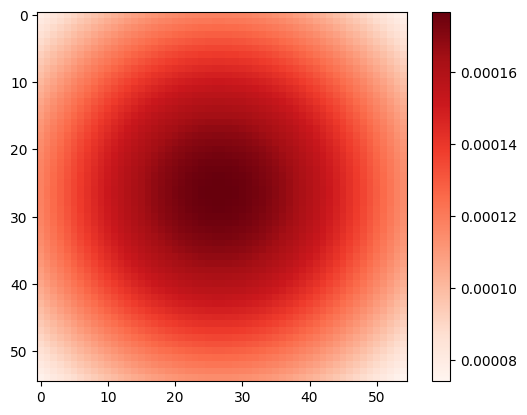

Kernel shape:  (55, 55)


In [ ]:
kernel = gaussian2D(55, 30)

plot_kernel(kernel)

In [ ]:
img_gray = data.gravel()
print("Image shape:", img_gray.shape)
print("Max pixel value:", img_gray.max()) #check if properly normalized

Image shape: (512, 512)
Max pixel value: 237


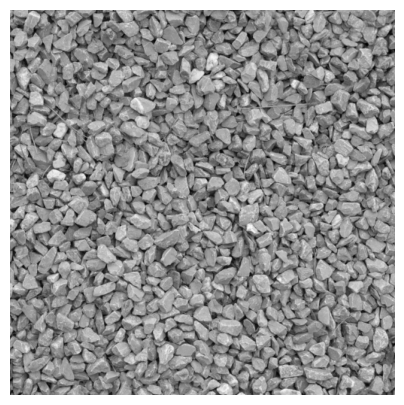

Image shape:  (512, 512)


In [ ]:
plot_image(img_gray)

# Linear filtering

## *grayscale* image

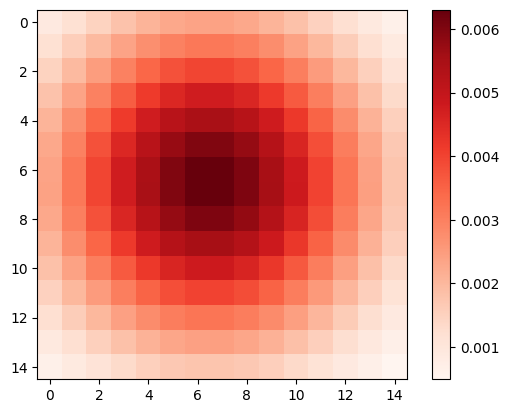

Kernel shape:  (15, 15)


In [ ]:
## DEFINE & PLOT KERNEL

# kernel shape (k, k). k should be odd
k = 15

# spread for gaussian, spread > 1
spread = k/3 # or define manually

# calculate pad width from (k-1) / 2
pad_width = int((k-1)/2)

# define either a box kernel or a gaussian kernel by calling the pre defined functions
kernel = gaussian2D(k, spread)
# kernel = box_kernel(size=k)
plot_kernel(kernel)

In [ ]:
# pad image
img_zero_padded = np.pad(img_gray, pad_width=pad_width, mode="constant", constant_values=0)

# plot_image(img_zero_padded)


In [ ]:
# filter img with kernel via correlation
img_filtered = signal.correlate(img_zero_padded, kernel, mode='valid', method='auto') # experiment with method="direct"

# plot_image(img_filtered)

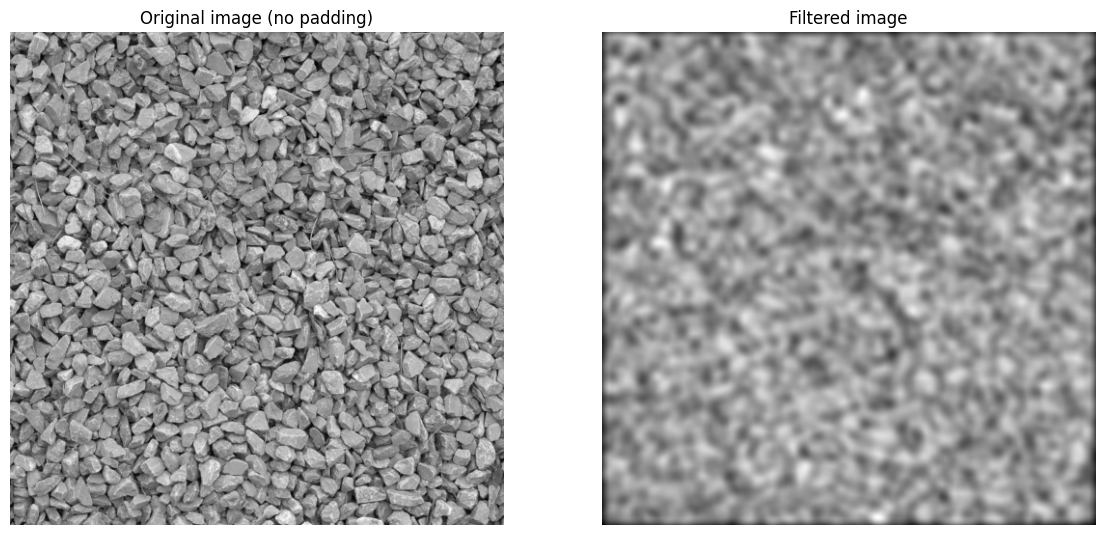

In [ ]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img_gray, cmap="gray")
ax1.title.set_text('Original image (no padding)')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_filtered, cmap="gray")
ax2.title.set_text('Filtered image')
ax2.axis("off")

plt.show()

# Edge detection

## Gradient Based Edge Detection: The Sobel Operator

In [ ]:
from skimage.filters import sobel_v, sobel_h, sobel

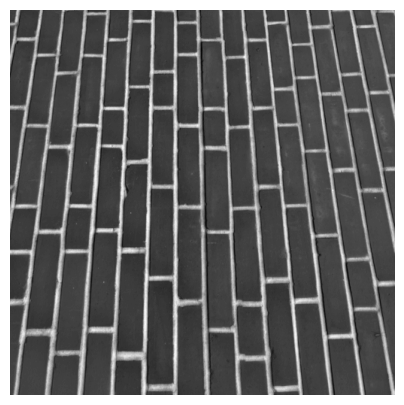

Image shape:  (512, 512)


In [ ]:
img = data.brick()
plot_image(img)

In [ ]:
img_v_edges = sobel_v(img)
img_h_edges = sobel_h(img)
img_edges = sobel(img)

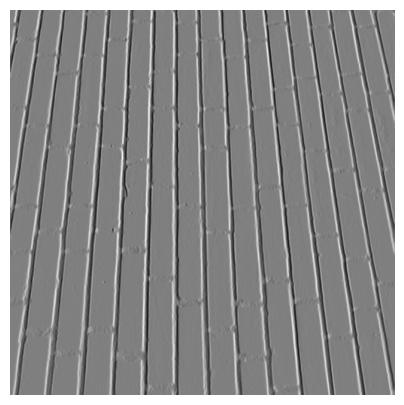

Image shape:  (512, 512)


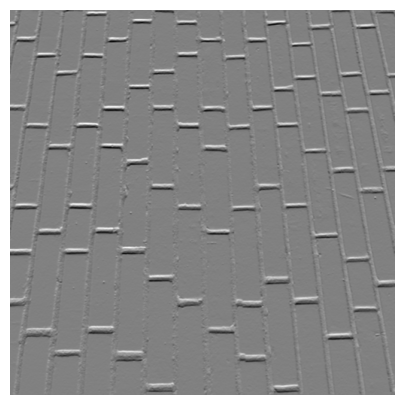

Image shape:  (512, 512)


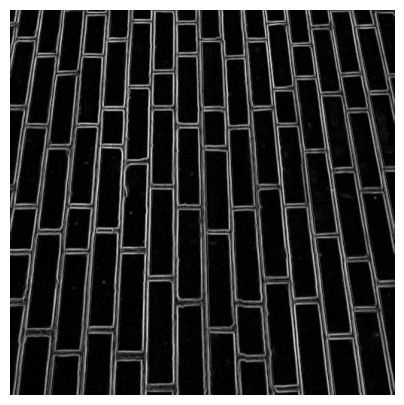

Image shape:  (512, 512)


In [ ]:
plot_image(img_v_edges)
plot_image(img_h_edges)
plot_image(img_edges)

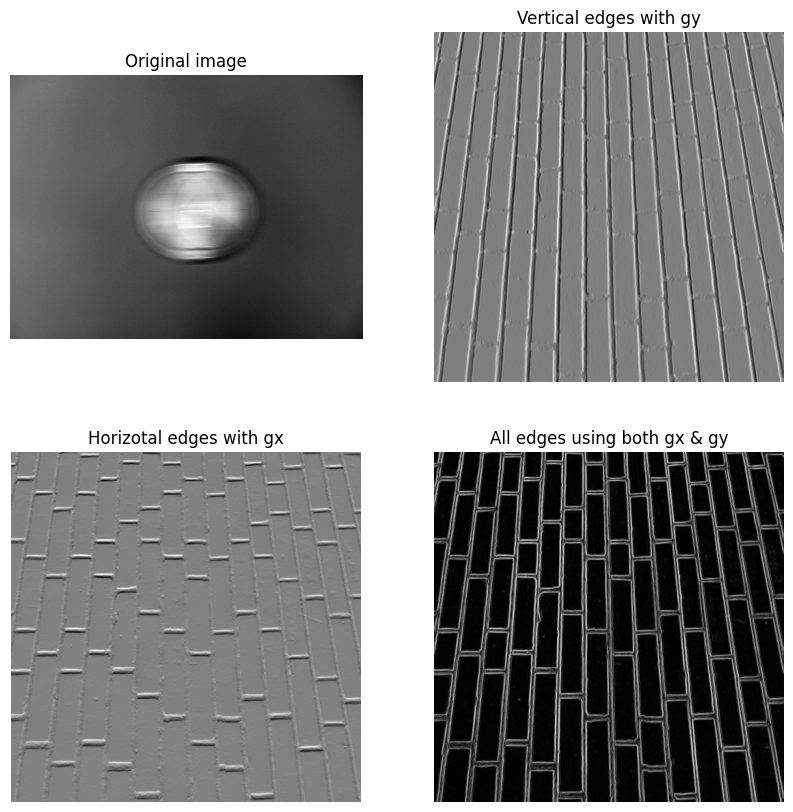

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_v_edges, cmap="gray")
ax2.title.set_text('Vertical edges with gy')
ax2.axis("off")

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img_h_edges, cmap="gray")
ax3.title.set_text('Horizotal edges with gx')
ax3.axis("off")

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_edges, cmap="gray")
ax4.title.set_text('All edges using both gx & gy')
ax4.axis("off")

plt.show()

## Laplacian Edge Detection & Sharpening

In [ ]:
from skimage.filters import laplace

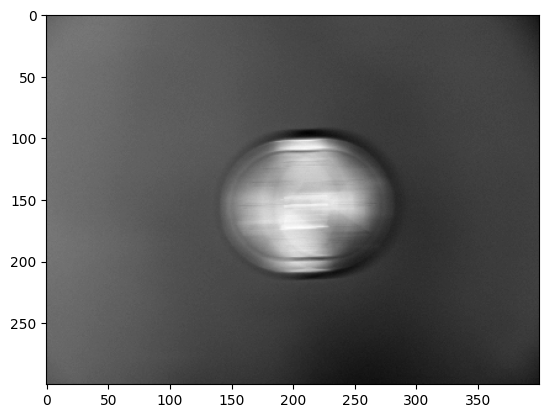

In [ ]:
img = data.clock()
plt.imshow(img, cmap='gray')

-0.23921568627451006


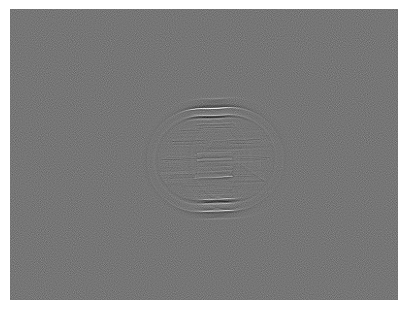

Image shape:  (300, 400)


In [ ]:
# # defining a kernel manually and 2D correlation approach

# laplace_kernel = np.array([[0, 1, 0],
#                            [1,-4, 1],
#                            [0, 1, 0]])
# img_edges_laplace = signal.correlate(img, laplace_kernel, mode='same', method='auto')

# using skimage laplace filter

img_edges_laplace = laplace(img, ksize=3)
print(img_edges_laplace.min())
img_edges_laplace = 255*(img_edges_laplace - img_edges_laplace.min())/(img_edges_laplace.max()-img_edges_laplace.min())
plot_image(img_edges_laplace)

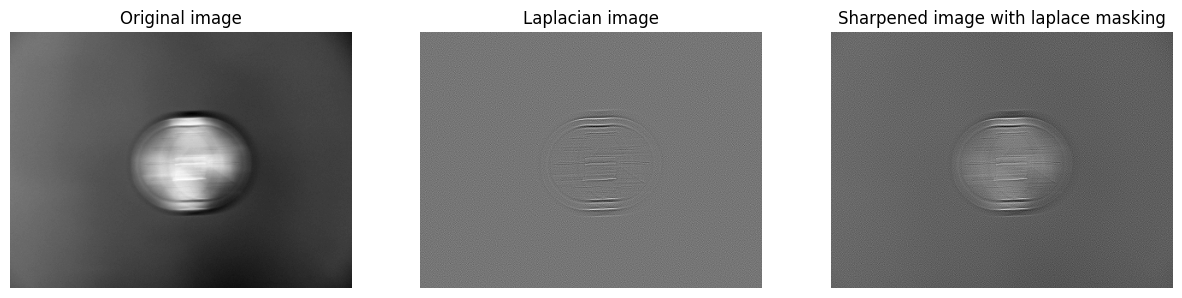

In [ ]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_edges_laplace, cmap="gray")
ax2.title.set_text('Laplacian image')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(0.3*img+0.7*img_edges_laplace, cmap="gray")
ax3.title.set_text('Sharpened image with laplace masking')
ax3.axis("off")

plt.show()